<a href="https://colab.research.google.com/github/pritisha24/SCT_DS_Task_3/blob/main/SCT_DS_Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Importing the required libraries***

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns


***Loading and exploring the dataset***

In [12]:
df = pd.read_csv("bank.csv", sep=';')
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


***Preprocessing the data ***

In [14]:

df = pd.get_dummies(df, drop_first=True)


X = df.drop('y_yes', axis=1)
y = df['y_yes']


***Splitting the data into training and testing set***

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


***Building and Training the Decision Tree Classifier***

In [16]:

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

***Evaluating the model***

Accuracy: 0.87
              precision    recall  f1-score   support

       False       0.93      0.92      0.93      1205
        True       0.42      0.44      0.43       152

    accuracy                           0.87      1357
   macro avg       0.68      0.68      0.68      1357
weighted avg       0.87      0.87      0.87      1357



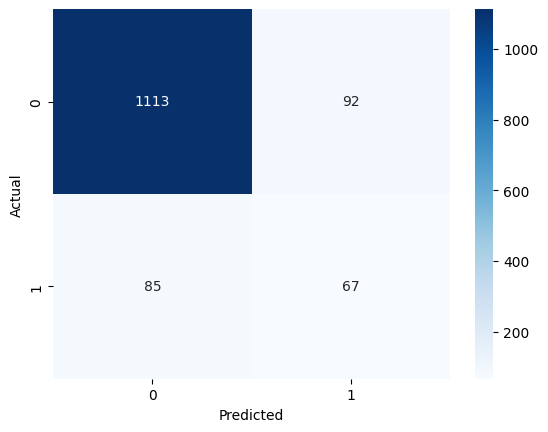

In [17]:

y_pred = clf.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


print(classification_report(y_test, y_pred))


conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


***Visualizing the Decision Tree***

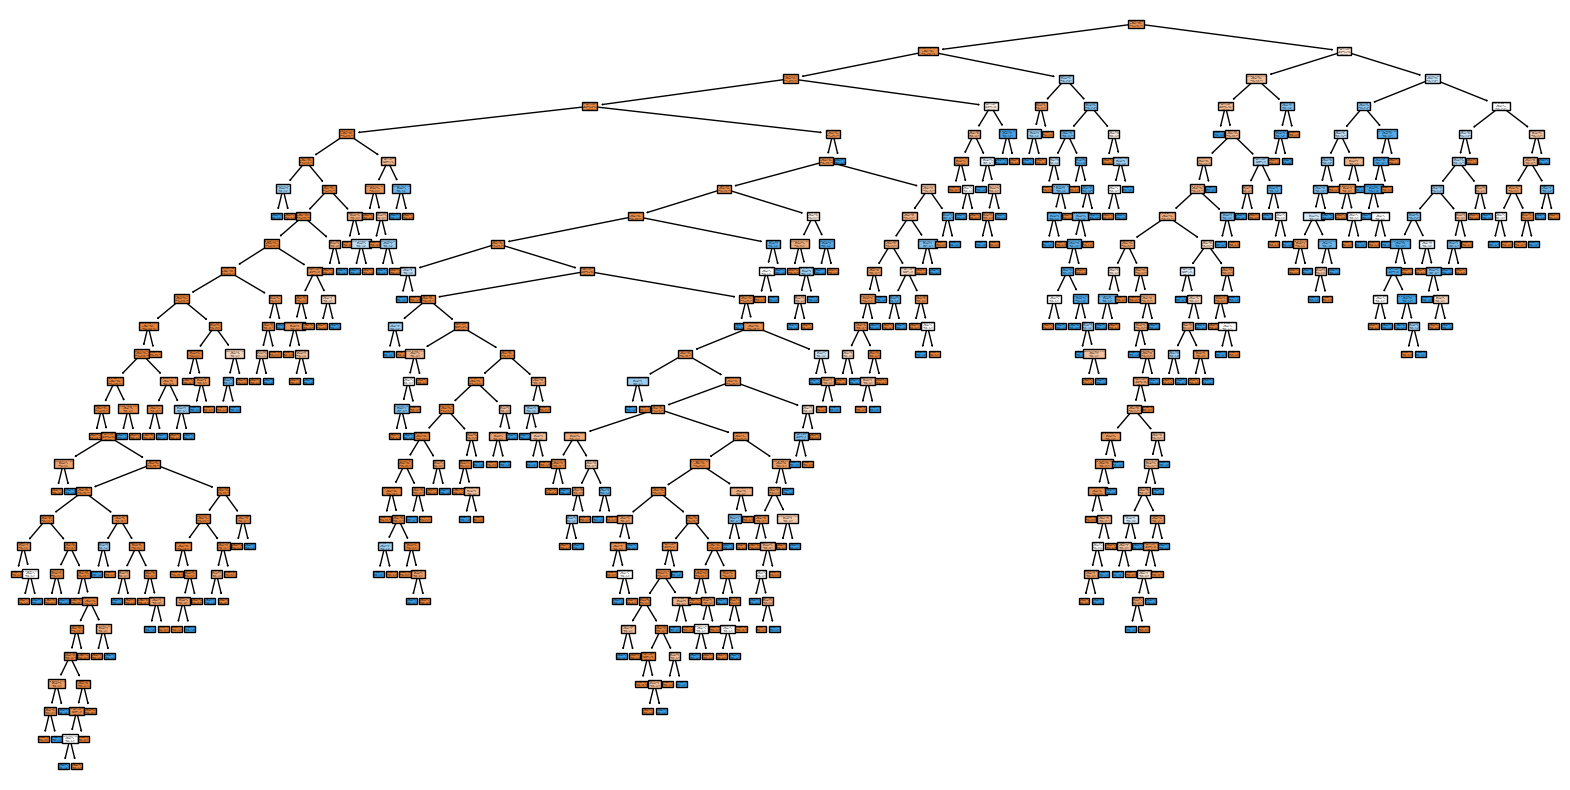

In [18]:
plt.figure(figsize=(20, 10))
tree.plot_tree(clf, filled=True, feature_names=X.columns, class_names=['No', 'Yes'])
plt.show()
